# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [133]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import pandas as pd
from matplotlib import pyplot as plt


In [134]:
browser = Browser('firefox')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [135]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [136]:
# Create a Beautiful Soup Object
html = browser.html
my_mars_data_soup = soup(html, 'html.parser')

In [161]:
# Extract all rows of data
table = my_mars_data_soup.find('table', class_= 'table')


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [162]:
# Find the table element
table = my_mars_data_soup.find('table', class_= 'table')

# Extract headers
headers = []
for header in table.find_all('th'):
    headers.append(header.text)

# Initialize the records list
records_list = []

# Extract rows
rows = table.find_all('tr', class_='data-row')

# Loop through the rows of the table with class 'data-row'
for row in rows:
    # Initialize a list to store the data of the current row
    row_data = []
    for cell in row.find_all('td'):
        row_data.append(cell.text.strip())
    records_list.append(row_data)

#Print each row in the records list
print(headers)

# Print each row in the records list
for record in records_list:
    print(record)



['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0']
['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0']
['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0']
['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0']
['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0']
['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0']
['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0']
['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0']
['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0']
['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0']
['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0']
['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0']
['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0']
['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0']
['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0']
['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0']
['171', 

In [139]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
dataframe = pd.DataFrame(records_list, columns=headers)
dataframe = dataframe.sort_values(by='month')

In [140]:
# Confirm DataFrame was created successfully
dataframe

,id,terrestrial_date,sol,ls,month,min_temp,pressure
933,960,2015-06-28,1028,4,1,-75.0,853.0
1629,1658,2017-06-27,1739,25,1,-77.0,861.0
1630,1662,2017-06-28,1740,25,1,-78.0,861.0
1631,1659,2017-06-29,1741,26,1,-78.0,863.0
1632,1661,2017-06-30,1742,26,1,-77.0,865.0
...,...,...,...,...,...,...,...
155,78,2013-01-26,169,252,9,-66.0,922.0
156,80,2013-01-27,170,252,9,-66.0,925.0
157,81,2013-01-28,171,253,9,-67.0,925.0
142,64,2013-01-13,156,243,9,-65.0,922.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [141]:
# Examine data type of each column
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1867 entries, 933 to 1398
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 116.7+ KB


In [142]:
# Change data types for data analysis
dataframe[['id','sol','ls','month','min_temp','pressure']] = dataframe[['id','sol','ls','month','min_temp','pressure']].apply(pd.to_numeric)
dataframe[['terrestrial_date']] = dataframe[['terrestrial_date']].apply(pd.to_datetime)

dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1867 entries, 933 to 1398
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int64         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 116.7 KB


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [143]:
# 1. How many months are there on Mars?
count_months = dataframe["month"].value_counts()
count_months

month
4     194
3     192
2     178
1     174
12    166
5     149
6     147
7     142
8     141
11    138
9     134
10    112
Name: count, dtype: int64

In [144]:
# 2. How many Martian days' worth of data are there?
count_martian_days = dataframe["month"].count()
count_martian_days

1867

In [145]:
avg_low_temp_month = dataframe.groupby('month')['min_temp'].mean().reset_index
avg_low_temp_month

<bound method Series.reset_index of month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64>

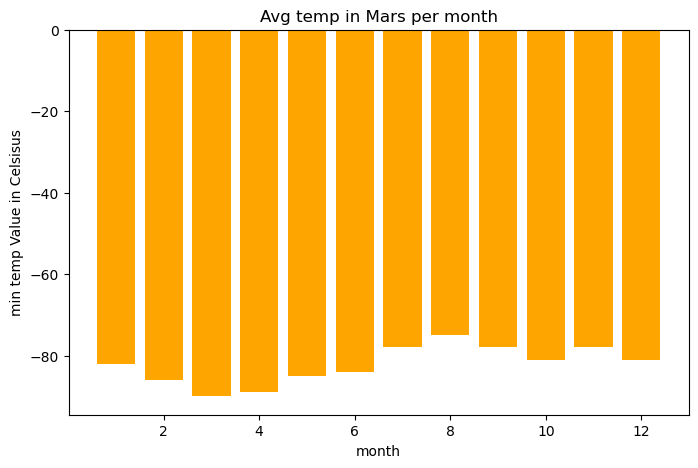

In [146]:
plt.figure(figsize=(8, 5))
plt.bar(dataframe['month'],dataframe['min_temp'], color=['orange'])
plt.xlabel('month')  # Label for x-axis
plt.ylabel('min temp Value in Celsisus')  # Label for y-axis
plt.title('Avg temp in Mars per month')
plt.show()

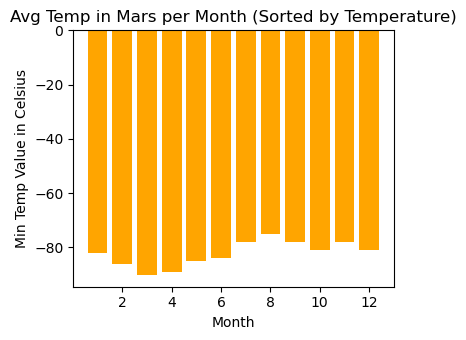

In [153]:


# for some reason I can't sort the bar chart 


plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

#dataframe_sorted = dataframe.sort_values('', ascending=False)

plt.subplot(122)
df_sorted = dataframe.sort_values('min_temp')
plt.bar('month', 'min_temp', data=df_sorted, color='orange')
plt.xlabel('Month')
plt.ylabel('Min Temp Value in Celsius')
plt.title('Avg Temp in Mars per Month (Sorted by Temperature)')
plt.show()

In [121]:
# Group by 'month' and calculate the average 'pressure'
avg_pressure_by_month = dataframe.groupby('month')['pressure'].mean().reset_index()

# Print the average pressure by month
print(avg_pressure_by_month)

    month    pressure
0       1  862.488506
1       2  889.455056
2       3  877.322917
3       4  806.329897
4       5  748.557047
5       6  745.054422
6       7  795.105634
7       8  873.829787
8       9  913.305970
9      10  887.312500
10     11  857.014493
11     12  842.156627


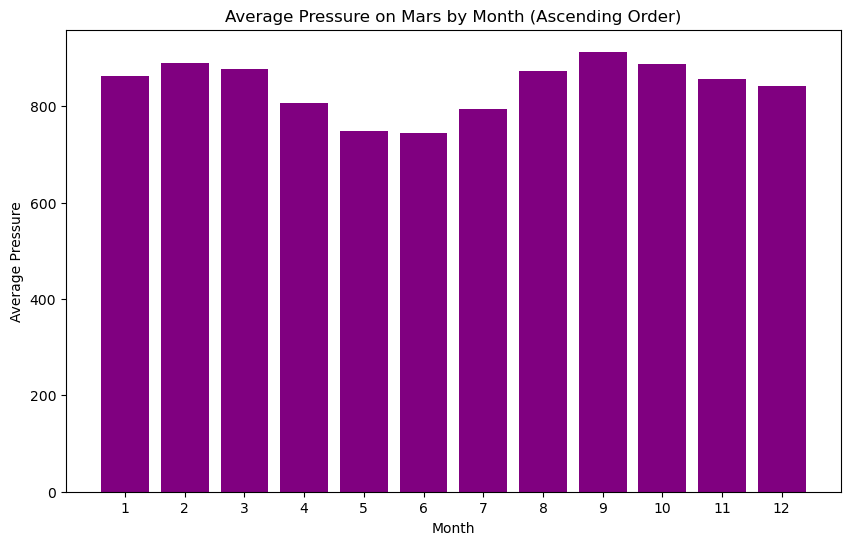

In [123]:
avg_pressure_by_month_sorted = avg_pressure_by_month.sort_values(by='pressure')

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(avg_pressure_by_month_sorted['month'], avg_pressure_by_month_sorted['pressure'], color='purple')
plt.xlabel('Month')
plt.ylabel('Average Pressure')
plt.title('Average Pressure on Mars by Month (Ascending Order)')
plt.xticks(range(1, 13))  # Ensure all months are shown on the x-axis
plt.show()


In [158]:
# 5. How many terrestrial (earth) days are there in a Martian year?
def terrestrial_days_in_martian_year(df_sorted):
    # Find the first and last sol in the dataset
    first_sol = df_sorted['sol'].min()
    last_sol = df_sorted['sol'].max()
    
    # Ensure the sols cover a complete Martian year
    if last_sol - first_sol < 669:  # A Martian year is roughly 669 sols
        print("The dataset does not cover a complete Martian year.")
        return None
    
    # Get the first and last terrestrial dates corresponding to the first and last sols
    first_date = df_sorted[df_sorted['sol'] == first_sol]['terrestrial_date'].min()
    last_date = df_sorted[df_sorted['sol'] == last_sol]['terrestrial_date'].max()
    
    # Calculate the number of terrestrial days between the two dates
    terrestrial_days = (last_date - first_date).days
    
    return terrestrial_days

# Example usage:
terrestrial_days = terrestrial_days_in_martian_year(df_sorted)
print(f"There are approximately {terrestrial_days} terrestrial days in a Martian year.")

There are approximately 2021 terrestrial days in a Martian year.


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [159]:
# Write the data to a CSV
dataframe.to_excel('mars_data.xlsx', index=False)

In [160]:
browser.quit()